# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [2]:
import pandas as pd

In [3]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
6718,18,Private,152004,11th,7,Never-married,Other-service,Own-child,Black,Male,0,0,20,United-States,<=50K
5551,51,Local-gov,277024,HS-grad,9,Separated,Protective-serv,Not-in-family,Black,Male,0,0,40,United-States,<=50K
20994,61,Private,54373,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
13147,25,Private,101812,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,41,United-States,<=50K
25667,31,Private,101761,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,51,United-States,<=50K
6234,22,Self-emp-inc,269583,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,2580,0,40,United-States,<=50K
5508,18,Private,201901,11th,7,Never-married,Sales,Own-child,White,Female,0,0,10,United-States,<=50K
11685,51,Private,43354,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
29755,60,Federal-gov,119832,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,7298,0,40,United-States,>50K
30678,18,Private,240330,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,18,United-States,<=50K


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Missing Values

In [6]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


#### Percentage of missing data: 0%

# Descriptive Statistics

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


# Analyze hours-per-week Target Distribution

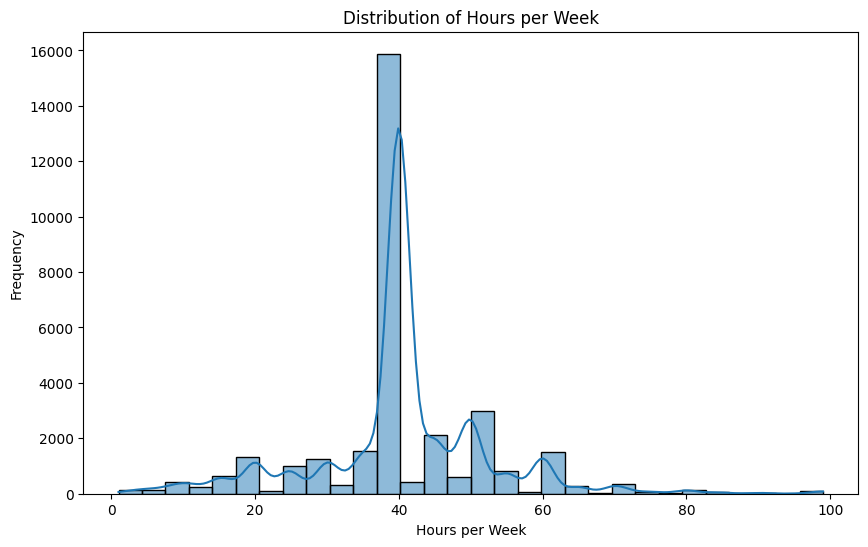

In [10]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['hours-per-week'], bins=30, kde=True)

plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')

plt.show()


#### Majority of people work full time, around 40 hours a week

In [12]:
print(f"Skewness: {data['hours-per-week'].skew():.2f}")
print(f"Kurtosis: {data['hours-per-week'].kurtosis():.2f}")

Skewness: 0.23
Kurtosis: 2.92


#### Distribution is symmetrical, showing a peak for working 40 hours a week

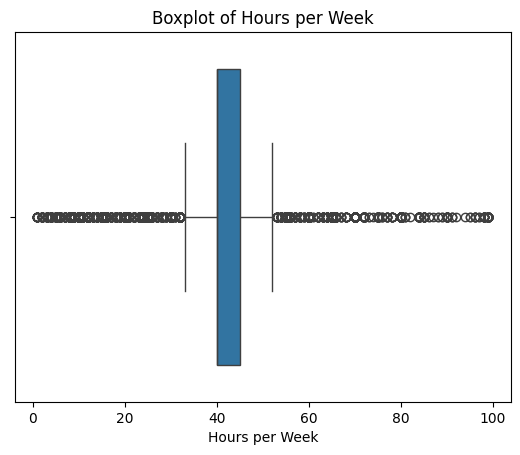

In [13]:
sns.boxplot(x=data['hours-per-week'])
plt.title('Boxplot of Hours per Week')
plt.xlabel('Hours per Week')
plt.show()

In [14]:
# How many outliers?

Q1 = data['hours-per-week'].quantile(0.25)
Q3 = data['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['hours-per-week'] < lower_bound) | (data['hours-per-week'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 9008


#### The outliers present in the boxplot indicate people who work under ~30 hours or over ~50 hours. This indicates either freelancers and part time workers or workaholics

## Outliers in age column


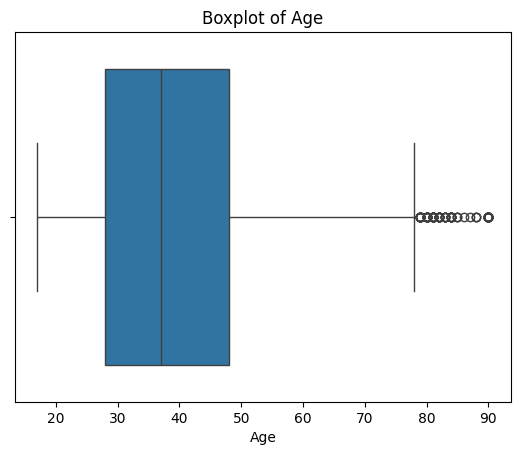

In [15]:
sns.boxplot(x=data['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [16]:
# How many outliers?

Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 143


#### The 143 outliers indicate people over the age of ~78

# Summary

#### Most people work around 40 hours a week, which indicates a "full-time" work schedule.
#### Outliers indicate part-time workers, freelancers and workaholics or antrepreneurs. 